In [1]:
import numpy as np
from time import time
import os
import sys
import scipy
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import BigBadBrain as bbb
import matplotlib.pyplot as plt

In [2]:
file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_30/optic/functional_green.nii'

In [3]:
brain = bbb.load_numpy_brain(file)


~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 43.29 sec


In [5]:
brain.shape

(256, 256, 17, 5064)

In [7]:
brain = np.reshape(brain, (-1,brain.shape[-1]))

In [8]:
brain.shape

(535936, 4170)

In [ ]:
save_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_21/brain_z_ryan'

In [ ]:
np.savetxt(save_file, brain)

In [8]:
np.save(save_file, brain)

In [6]:
directory = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/ball_motor'

In [23]:
forward = bbb.load_fictrac(directory, file = 'rotation.dat')


~~ load_fictrac ~~
load_fictrac done. Duration: 79.72 ms


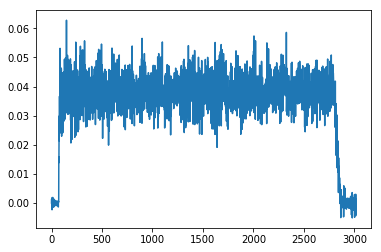

In [27]:
plt.plot(np.asarray(forward['dRotLabZ']))
plt.show()

In [2]:
directory = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_25/'
channel = 'green'
brain = bbb.get_z_brain(directory, channel)


~~ get_z_brain ~~
Trying to load z-scored brain.

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 20.51 sec
get_z_brain done. Duration: 20.52 sec


In [3]:
brain.shape

(128, 92, 51, 4128)

In [4]:
behavior = 'speed'
sigma = 3
fps = 50 #of fictrac camera
dur = 30 * 60 * 1000 # experiment duration in ms

timestamps = bbb.load_timestamps(directory)
fictrac = bbb.load_fictrac(directory)
fictrac_interp = bbb.interpolate_fictrac(fictrac, timestamps, fps, dur, behavior=behavior, sigma=sigma)


~~ load_timestamps ~~
Trying to load timestamp data from hdf5 file.
Success.
load_timestamps done. Duration: 4.71 ms

~~ load_fictrac ~~
load_fictrac done. Duration: 2.82 sec

~~ interpolate_fictrac ~~
interpolate_fictrac done. Duration: 23.24 ms


In [9]:
fictrac_interp.shape

(4128, 51)

In [34]:
from sklearn.linear_model import LassoLarsIC
from sklearn.linear_model import LassoCV

In [ ]:
X shape: (4128, 600576)

In [13]:
dims = bbb.get_dims(brain)

X = np.swapaxes(np.reshape(brain,(-1,brain.shape[-1])),0,1)
print('X shape: {}'.format(X.shape))

z = 0
Y = fictrac_interp[:,z]
model = LassoLarsIC(criterion='bic')
model.fit(X, Y)

score = model.score(X,Y)

print('betas shape: {}'.format(np.shape(model.coef_)))
sys.stdout.flush()

betas = np.reshape(model.coef_, (dims['y'], dims['x'], dims['z']))

print('betas shape: {}'.format(np.shape(betas)))
sys.stdout.flush()

X shape: (4128, 600576)
betas shape: (600576,)
betas shape: (128, 92, 51)


In [ ]:
model = LassoCV()
model.fit(X, Y)


In [23]:
betas = np.reshape(model.coef_,(128,92))

In [7]:
dims = bbb.get_dims(brain)

z = 20
X = np.swapaxes(np.reshape(brain[:,:,z,:],(-1,brain.shape[-1])),0,1)
print('X shape: {}'.format(X.shape))

Y = fictrac_interp[:,z]

X shape: (4128, 11776)


In [8]:
from sklearn import linear_model

In [9]:
reg = linear_model.LinearRegression()
reg.fit(X,Y)

#score = model.score(X,Y)

#print('betas shape: {}'.format(np.shape(model.coef_)))
#sys.stdout.flush()

#betas = np.reshape(model.coef_, (dims['y'], dims['x'], dims['z']))

#print('betas shape: {}'.format(np.shape(betas)))
#sys.stdout.flush()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
reg.score(X,Y)

1.0

In [12]:
betas = reg.coef_
betas.shape

(11776,)

In [13]:
betas = np.reshape(betas,(128,92))

In [40]:
np.max(betas)

0.0

In [14]:
X = np.swapaxes(np.reshape(brain,(-1,brain.shape[-1])),0,1)

0.0

In [33]:
X2 = np.swapaxes(X,0,1)

In [34]:
X2.shape

(600576, 4128)

In [36]:
X2 = np.reshape(X2,(128,92,51,-1))

In [37]:
X2.shape

(128, 92, 51, 4128)

In [17]:
betas.shape

(128, 92, 51)

In [18]:
X

array([[-2.78101742e-01,  3.25802952e-01, -5.64675927e-01, ...,
        -5.24652042e-17, -5.38480153e-17, -4.32129409e-17],
       [-2.80648261e-01, -4.54506963e-01, -1.07020783e+00, ...,
        -5.24652042e-17, -5.38480153e-17, -4.32129409e-17],
       [-2.80651778e-01, -3.84613067e-01,  4.20372784e-01, ...,
        -5.24652042e-17, -5.38480153e-17, -4.32129409e-17],
       ...,
       [-6.86861634e-01, -5.63191473e-01, -4.64802355e-01, ...,
        -8.73508692e-01, -5.22192001e-01, -1.15720880e+00],
       [-6.84624791e-01, -5.61164916e-01, -4.63010579e-01, ...,
         2.37877533e-01,  1.38124561e+00,  4.25453395e-01],
       [-6.84635758e-01, -5.61173856e-01, -4.63018686e-01, ...,
        -1.50145203e-01,  1.69264793e-01, -1.15805066e+00]])

In [19]:
Y

array([0.00230502, 0.00369028, 0.00556785, ..., 0.00225898, 0.00421574,
       0.00563117])

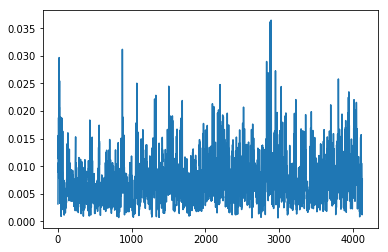

In [15]:
plt.plot(Y)
plt.show()

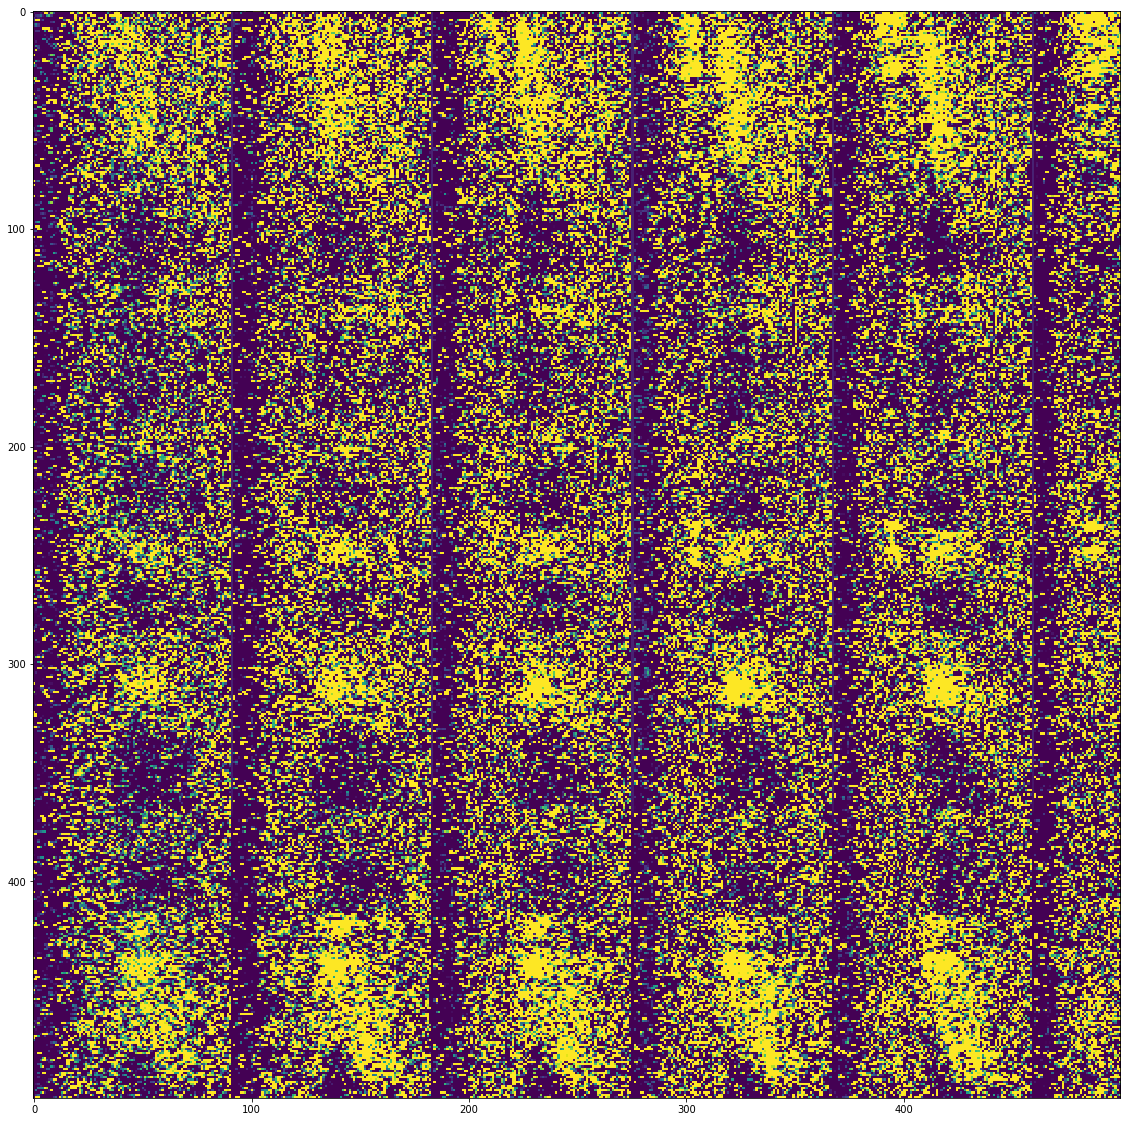

In [33]:
plt.figure(figsize=(20,20))
plt.imshow(X[:500,:500], vmin=-.05, vmax=.5)
plt.show()

In [17]:
X.shape

(4128, 11776)

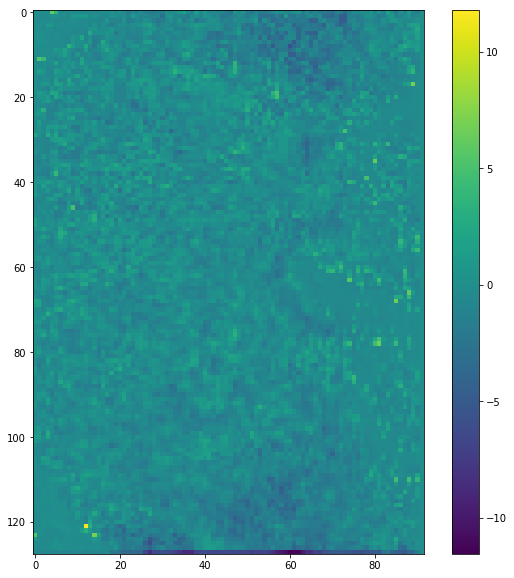

In [32]:
plt.figure(figsize=(10,10))
plt.imshow(brain[:,:,20,0])
plt.colorbar()
plt.show()

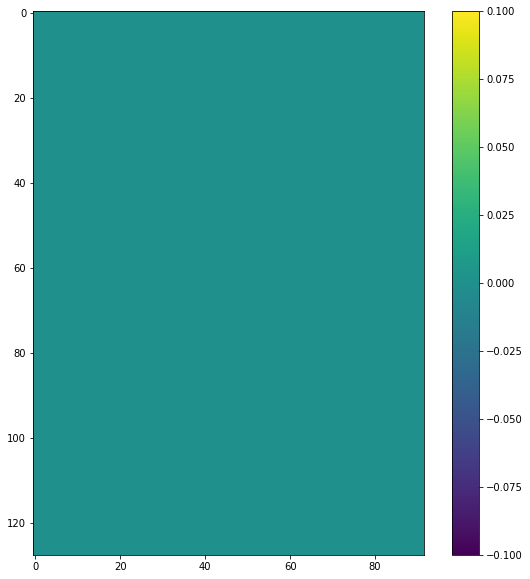

In [24]:
plt.figure(figsize=(10,10))
plt.imshow(betas)
plt.colorbar()
plt.show()

In [4]:
file1 = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_25/'
file2 = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/'

In [5]:
fictrac1 = bbb.load_fictrac(file1)
fictrac2 = bbb.load_fictrac(file2, 'fictrac (19).dat')


~~ load_fictrac ~~
load_fictrac done. Duration: 3.77 sec

~~ load_fictrac ~~
load_fictrac done. Duration: 3.24 sec


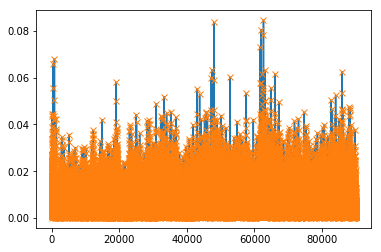

In [7]:
plt.plot(np.asarray(fictrac1['speed']))
plt.plot(np.asarray(fictrac2['speed']),'x')
plt.show()